In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy import interpolate

import sys
sys.path.append('../')
# import my functions
from define_experiment_run import experiment, run, scratch_dir, Nevents
#runs = [43, 44, 45, 46, 47, 48, 56, 57, 61, 62, 63, 64, 
#       68, 70, 71, 72, 73, 74, 79, 80, 81, 82, 83]
runs = [43, 44, 46, 47, 48, 56, 57, 61, 62, 63, 64, 
        68, 70, 71, 72, 73, 74, 79, 80, 81, 82, 83]

empty = np.empty(0)
agreement = empty
dt = empty
imax1 = empty
imax2 = empty
t = np.linspace(-40, 40, num=50)
print(t)
c = 0
for run in runs:
    fname = '%sxtcav_stats_run%d.h5' % (scratch_dir, run)
    try:
        f = h5py.File(fname, 'r')
        print('Opened %s' % fname)
    except IOError:
        print('Could not open %s' % fname)
        continue
    c += 1
    powerCOM = f['powerCOM']
    tCOM = f['tCOM'][:]
    print(powerCOM.shape)
    print(tCOM.shape)
    # choice here: do I have to interp every shot? That is time-consuming...
    pt_function = interpolate.interp1d(tCOM, powerCOM)
    if c==1:
        power = pt_function(t)
    else:
        p_tmp = pt_function(t)
        #print(tCOM.shape)
        #t = np.append(t, tCOM, axis=0)
        #print(t.shape)
        power = np.append(power, p_tmp)
        print(power.shape)
    #print(f)
    #list(f.keys())
    #tRMS = f['tRMS'][:]
    #powerRMS = f['powerRMS']
    #power = np.append(power, powerCOM)
    # only look at COM now...
    dt_COM = f['dt_COM']
    dt = np.append(dt, dt_COM)
    #print(dt_COM[:])
    imax1_COM = f['imax1_COM'][:]
    imax2_COM = f['imax2_COM'][:]
    imax1 = np.append(imax1, imax1_COM)
    imax2 = np.append(imax2, imax2_COM)
    #print(imax1_COM)
    #print(imax2_COM)
    agree = f['agreement'][:]
    agreement = np.append(agreement, agree)
    #print('agreement:')
    #print(agreement)

n = 9
print(t.shape)
print(imax1[n])
plt.plot(t[n, :], power[n, :])
#plt.plot(tRMS[n, :], powerRMS[n, :], color='grey')
plt.axvline(x=t[n, imax1[n]], color='black', linestyle='dashed')
plt.axvline(x=t[n, imax2[n]], color='black', linestyle='dashed')

print('agreement = %f' % agreement[n])
print('dt = %f' % dt[n])


[-40.         -38.36734694 -36.73469388 -35.10204082 -33.46938776
 -31.83673469 -30.20408163 -28.57142857 -26.93877551 -25.30612245
 -23.67346939 -22.04081633 -20.40816327 -18.7755102  -17.14285714
 -15.51020408 -13.87755102 -12.24489796 -10.6122449   -8.97959184
  -7.34693878  -5.71428571  -4.08163265  -2.44897959  -0.81632653
   0.81632653   2.44897959   4.08163265   5.71428571   7.34693878
   8.97959184  10.6122449   12.24489796  13.87755102  15.51020408
  17.14285714  18.7755102   20.40816327  22.04081633  23.67346939
  25.30612245  26.93877551  28.57142857  30.20408163  31.83673469
  33.46938776  35.10204082  36.73469388  38.36734694  40.        ]
Opened /reg/d/psdm/cxi/cxilv0418/scratch/northeyt/xtcav_stats_run43.h5
(62778, 128)
(62778, 128)


ValueError: x and y arrays must be equal in length along interpolation axis.

In [9]:

tmp = agreement
nvalid = len(tmp)
print(nvalid)
print('Equal 0:')
print(np.sum(tmp == 0))
print(np.sum(tmp > 0.9) / nvalid)
print(np.sum(tmp > 0.8) / nvalid)
print(np.sum(tmp > 0.5) / nvalid)

1317529
Equal 0:
0
0.6085141199928047
0.8560654072889478
0.9764771781114495


Text(0, 0.5, 'Counts')

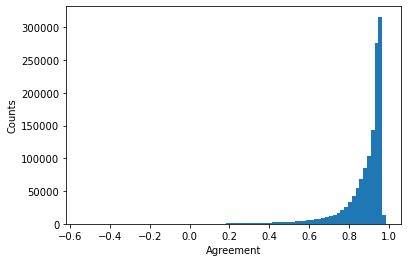

In [10]:
plt.hist(agreement, bins=80)
plt.xlabel('Agreement')
plt.ylabel('Counts')

1317529


Text(0.5, 1.0, 'dt_COM')

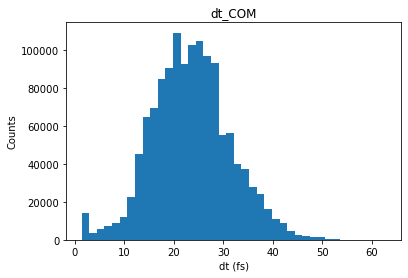

In [13]:
nbins = 40
print(len(dt))
plt.hist(dt, bins=nbins)
plt.xlabel('dt (fs)')
plt.ylabel('Counts')
plt.title('dt_COM')

#dt_RMS = f['dt_RMS']
#dt = dt_RMS
#plt.figure()
#plt.hist(dt_RMS, bins=nbins)
#plt.xlabel('dt (fs)')
#plt.ylabel('Counts')
#plt.title('dt_RMS')